# Explorarory Data Analysis (**CO2 from the Energy Sector**)

> **Tracking the changes in CO2 emissions from the energy sector.**

## Whole Data

### Step-1: Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step-2: Importing Dataset

In [2]:
df = pd.read_csv('energy_use_data_11-29-2021.csv')
df.head().T

,0,1,2,3,4
Domain Code,GN,GN,GN,GN,GN
Domain,Energy Use,Energy Use,Energy Use,Energy Use,Energy Use
Area Code (ISO3),AFG,AFG,AFG,AFG,AFG
Area,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Element Code,7273,7273,7273,7273,7273
Element,Emissions (CO2),Emissions (CO2),Emissions (CO2),Emissions (CO2),Emissions (CO2)
Item Code,6801,6801,6801,6801,6801
Item,Gas-Diesel oil,Gas-Diesel oil,Gas-Diesel oil,Gas-Diesel oil,Gas-Diesel oil
Year Code,1990,1991,1992,1993,1994
Year,1990,1991,1992,1993,1994


In [3]:
# Clean data - exclude unnecessary data improved readability

df_clean = pd.read_csv("energy_use_data_11-29-2021.csv")
x = ["Year Code", "Domain Code", "Domain", "Element Code", "Element", "Item Code", "Flag", ]
df_clean.drop( x, inplace = True, axis =1)
df_clean.head()

,Area Code (ISO3),Area,Item,Year,Unit,Value,Flag Description
0,AFG,Afghanistan,Gas-Diesel oil,1990,kilotonnes,231.4918,FAO estimate
1,AFG,Afghanistan,Gas-Diesel oil,1991,kilotonnes,188.5317,FAO estimate
2,AFG,Afghanistan,Gas-Diesel oil,1992,kilotonnes,47.9904,FAO estimate
3,AFG,Afghanistan,Gas-Diesel oil,1993,kilotonnes,38.6116,FAO estimate
4,AFG,Afghanistan,Gas-Diesel oil,1994,kilotonnes,31.4465,FAO estimate


### Step-3: Data Shape

In [4]:
row, col=df.shape
print('Total number of observations/rows/entries:', row)
print('Total number of columns:', col)

row, col=df_clean.shape
print('\nTotal number of observations/rows/entries:', row)
print('Total number of columns:', col)

Total number of observations/rows/entries: 46131
Total number of columns: 14

Total number of observations/rows/entries: 46131
Total number of columns: 7


### Step-4: Data Structure

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46131 entries, 0 to 46130
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area Code (ISO3)  46131 non-null  object 
 1   Area              46131 non-null  object 
 2   Item              46131 non-null  object 
 3   Year              46131 non-null  int64  
 4   Unit              46131 non-null  object 
 5   Value             46131 non-null  float64
 6   Flag Description  46131 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.5+ MB


### Step-5: Finding Missing Values

In [6]:
df_clean.isnull().sum()

Area Code (ISO3)    0
Area                0
Item                0
Year                0
Unit                0
Value               0
Flag Description    0
dtype: int64

### Step-6: Summary Statistics

In [7]:
df_clean.describe()

,Year,Value
count,46131.000000,46131.000000
mean,1998.988814,863.132722
std,13.111035,5274.730687
min,1970.000000,0.000000
25%,1990.000000,3.370750
50%,2000.000000,21.489900
75%,2010.000000,165.728900
max,2019.000000,197674.559300


### Step-7: Value Counts

In [8]:
df_clean.Item.value_counts()

Motor Gasoline                       8756
Gas-Diesel oil                       8160
Liquefied petroleum gas (LPG)        7431
Fuel oil                             6418
Electricity                          6061
Coal                                 4304
Natural gas (including LNG)          3787
Gas-diesel oils used in fisheries     747
Fuel oil used in fisheries            467
Name: Item, dtype: int64

In [9]:
# unique values in each column
df_clean.nunique() 

Area Code (ISO3)      229
Area                  229
Item                    9
Year                   50
Unit                    1
Value               34024
Flag Description        3
dtype: int64

### Step-8: Check the Normality of Data

In [10]:
df_clean['Item'].unique()

array(['Gas-Diesel oil', 'Motor Gasoline', 'Natural gas (including LNG)',
       'Coal', 'Electricity', 'Liquefied petroleum gas (LPG)', 'Fuel oil',
       'Gas-diesel oils used in fisheries', 'Fuel oil used in fisheries'],
      dtype=object)

In [11]:
# groupby specific item and sum the values
df_clean.groupby(['Item','Value']).head()


,Area Code (ISO3),Area,Item,Year,Unit,Value,Flag Description
0,AFG,Afghanistan,Gas-Diesel oil,1990,kilotonnes,231.4918,FAO estimate
1,AFG,Afghanistan,Gas-Diesel oil,1991,kilotonnes,188.5317,FAO estimate
2,AFG,Afghanistan,Gas-Diesel oil,1992,kilotonnes,47.9904,FAO estimate
3,AFG,Afghanistan,Gas-Diesel oil,1993,kilotonnes,38.6116,FAO estimate
4,AFG,Afghanistan,Gas-Diesel oil,1994,kilotonnes,31.4465,FAO estimate
...,...,...,...,...,...,...,...
46126,ZWE,Zimbabwe,Electricity,2015,kilotonnes,424.3909,International reliable sources
46127,ZWE,Zimbabwe,Electricity,2016,kilotonnes,213.9419,International reliable sources
46128,ZWE,Zimbabwe,Electricity,2017,kilotonnes,187.7450,International reliable sources
46129,ZWE,Zimbabwe,Electricity,2018,kilotonnes,218.3081,International reliable sources


### Step-9: Plotting

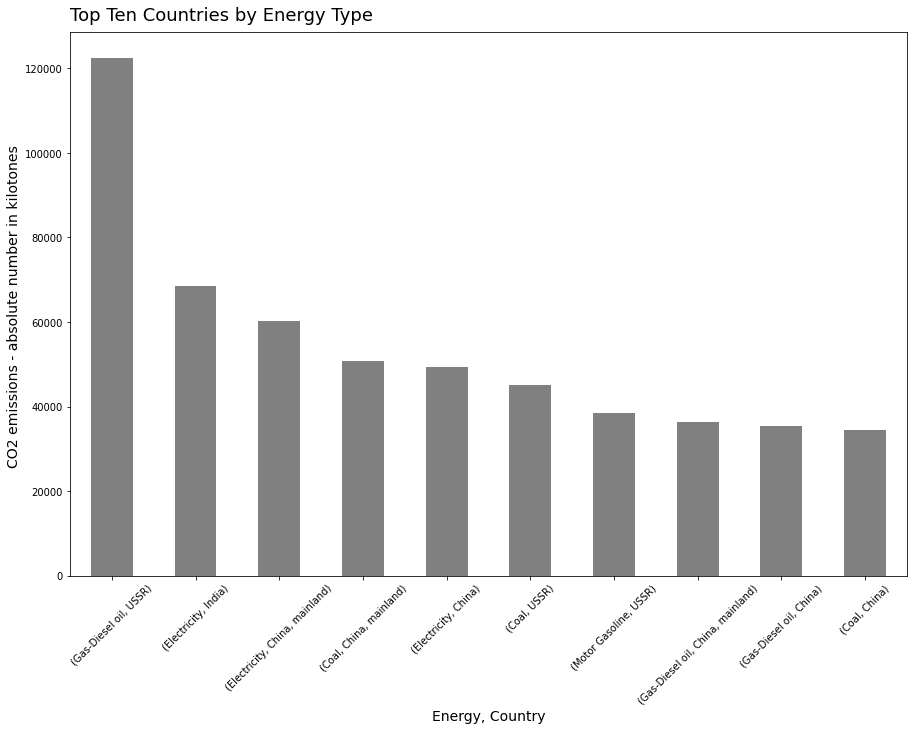

In [12]:
# Grouping the data by Item and Area and then calculating the mean and plotting the graph by top 10 countries
plt.figure(figsize = (15,10))
df_clean.groupby(['Item', 'Area']).mean()['Value'].sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'grey')
plt.xlabel("Energy, Country", fontsize=14)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)
plt.title("Top Ten Countries by Energy Type", fontsize = 18, loc='left', y=1.01  )
plt.xticks(rotation=45)
plt.show()

In [13]:
df_clean.head()

,Area Code (ISO3),Area,Item,Year,Unit,Value,Flag Description
0,AFG,Afghanistan,Gas-Diesel oil,1990,kilotonnes,231.4918,FAO estimate
1,AFG,Afghanistan,Gas-Diesel oil,1991,kilotonnes,188.5317,FAO estimate
2,AFG,Afghanistan,Gas-Diesel oil,1992,kilotonnes,47.9904,FAO estimate
3,AFG,Afghanistan,Gas-Diesel oil,1993,kilotonnes,38.6116,FAO estimate
4,AFG,Afghanistan,Gas-Diesel oil,1994,kilotonnes,31.4465,FAO estimate


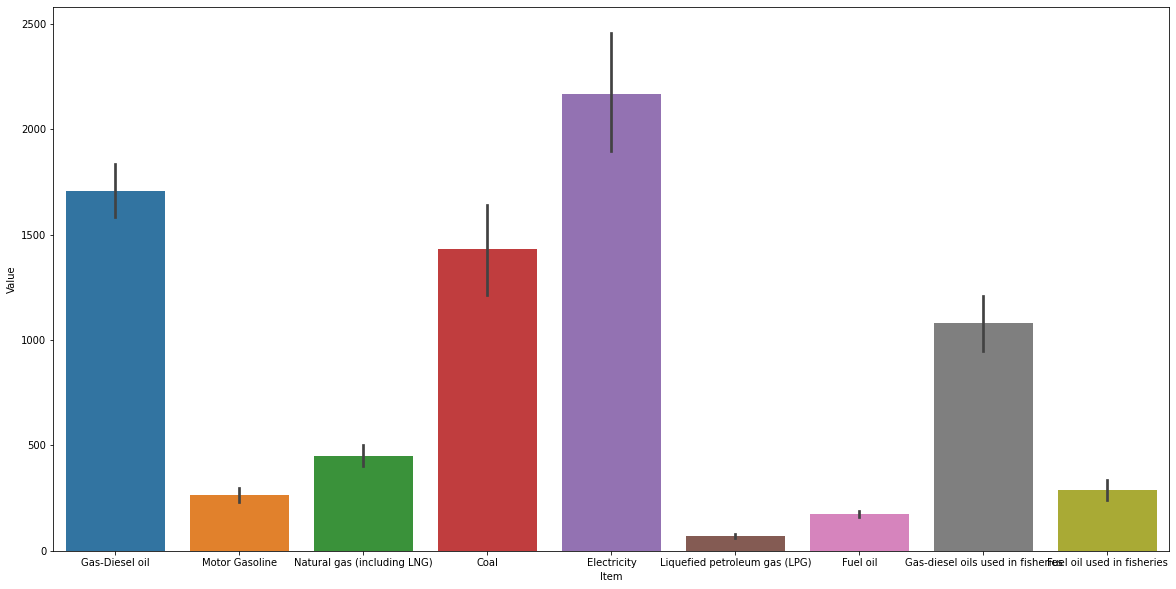

In [14]:
plt.figure(figsize = (20,10))
sns.barplot(x='Item', y='Value', data=df)
plt.show()

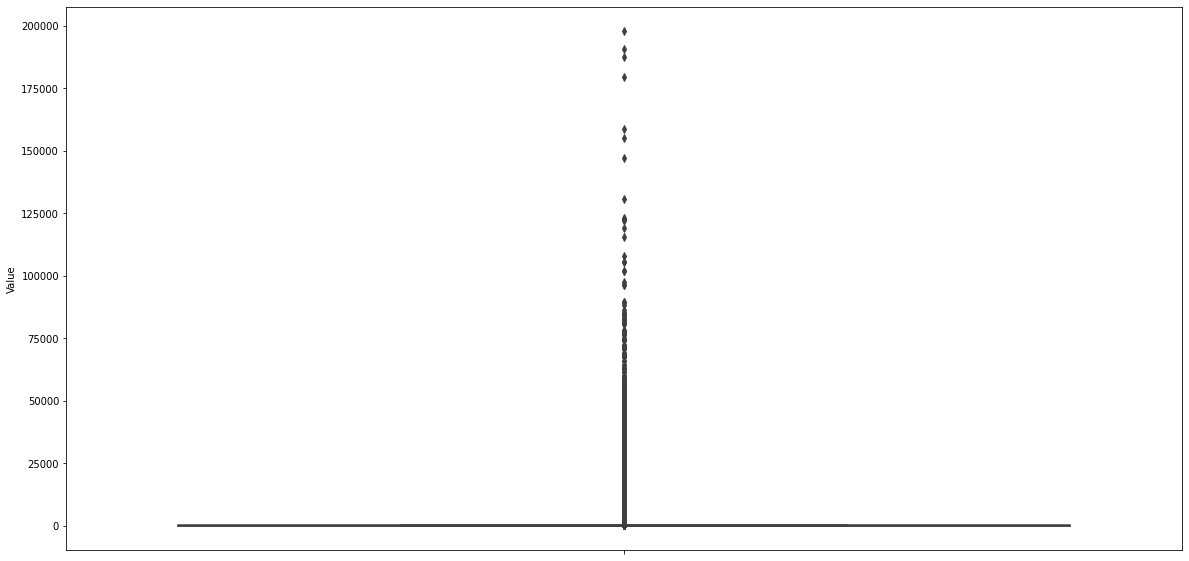

In [15]:
plt.figure(figsize = (20,10))
sns.boxplot(y='Value', data=df)
plt.show()

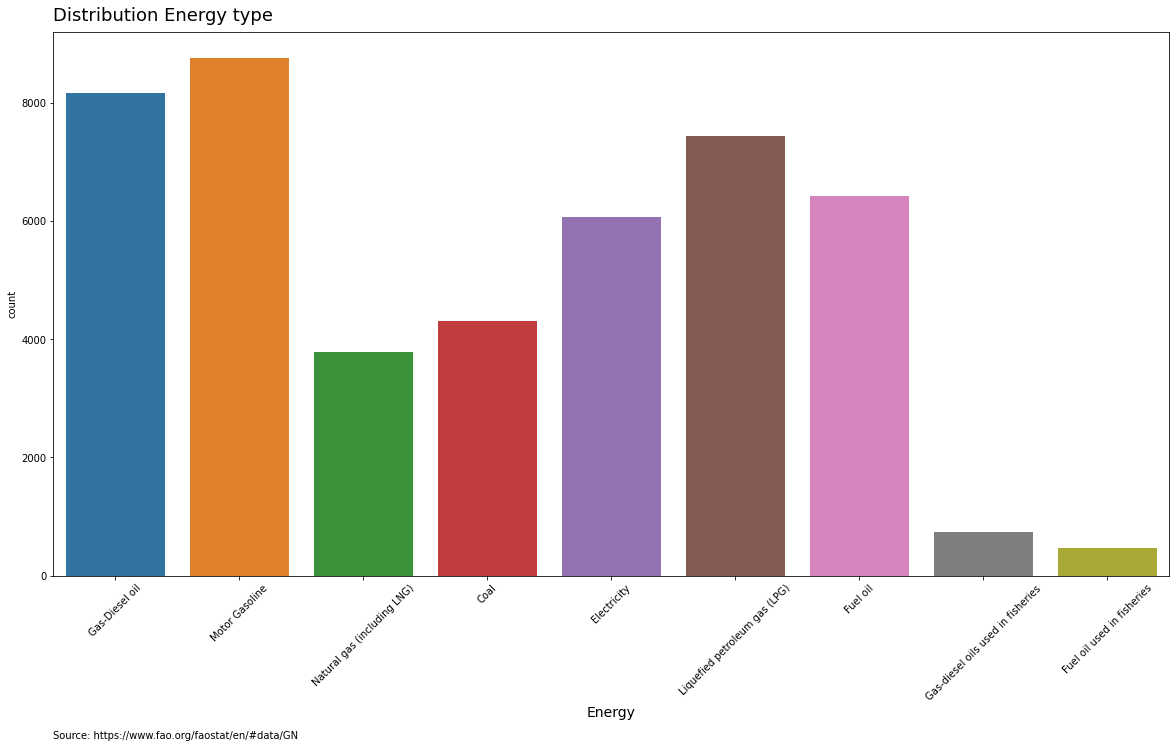

In [16]:
#Construct visualisation 
plt.figure(figsize = (20,10))
sns.countplot(x = "Item", data = df)

#customisation
plt.xlabel("Energy", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.3), xycoords ='axes fraction')
plt.title("Distribution Energy type", fontsize = 18, loc='left', y=1.01  )
plt.xticks(rotation=45)
plt.show()

## Exploring Specific Region Data (Subcontinent)
In this section the data specifically for the subcontinent countries will be examined. the list of countries are as follows:

* Bangladesh,
* India,
* Pakistan

In [17]:
df_sub = df_clean[df_clean["Area"].isin(["India", "Pakistan", 'Bangladesh'])]
df_sub.head()

,Area Code (ISO3),Area,Item,Year,Unit,Value,Flag Description
2915,BGD,Bangladesh,Gas-Diesel oil,1972,kilotonnes,31.8630,International reliable sources
2916,BGD,Bangladesh,Gas-Diesel oil,1973,kilotonnes,38.2356,International reliable sources
2917,BGD,Bangladesh,Gas-Diesel oil,1974,kilotonnes,149.7561,International reliable sources
2918,BGD,Bangladesh,Gas-Diesel oil,1975,kilotonnes,168.8739,International reliable sources
2919,BGD,Bangladesh,Gas-Diesel oil,1976,kilotonnes,178.4328,International reliable sources


In [18]:
df_sub.shape

(1019, 7)

In [19]:
PK_avg = df_sub[df_sub["Area"]=="Pakistan"]["Value"] 
IN_avg = df_sub[df_sub["Area"]=="India"]["Value"]
Bang_avg = df_sub[df_sub["Area"]=="Bangladesh"]["Value"]

In [20]:
df_sub.describe()

,Year,Value
count,1019.000000,1019.000000
mean,1995.056919,5089.548264
std,14.077065,19611.971126
min,1970.000000,0.052800
25%,1983.000000,7.789800
50%,1995.000000,185.034800
75%,2007.000000,817.537500
max,2019.000000,197674.559300


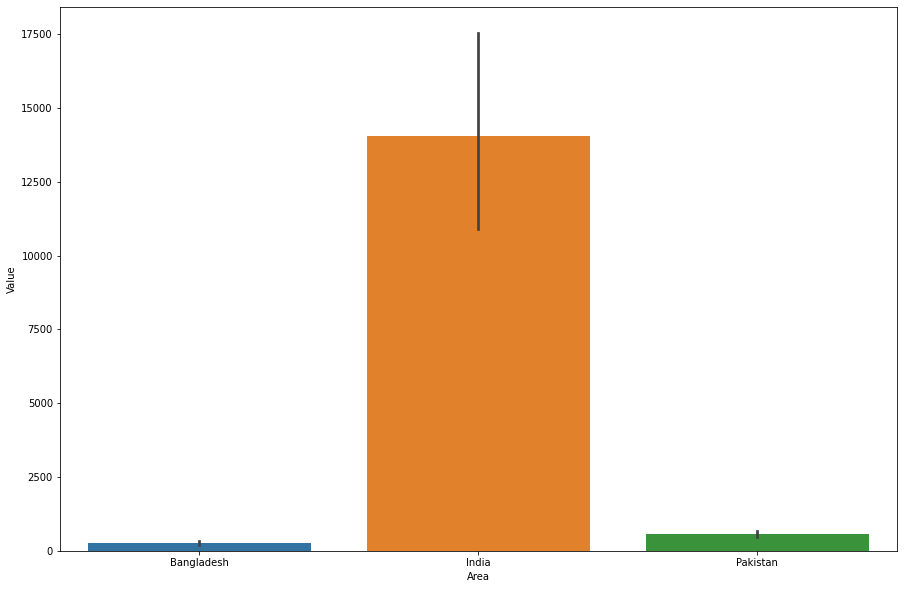

In [21]:
plt.figure(figsize = (15,10))
sns.barplot(x='Area', y='Value', data=df_sub)
plt.show()

In [22]:
df_sub = df_clean[df_clean["Area"].isin(["India", "Pakistan", 'Bangladesh'])]
df_sub.head()

,Area Code (ISO3),Area,Item,Year,Unit,Value,Flag Description
2915,BGD,Bangladesh,Gas-Diesel oil,1972,kilotonnes,31.8630,International reliable sources
2916,BGD,Bangladesh,Gas-Diesel oil,1973,kilotonnes,38.2356,International reliable sources
2917,BGD,Bangladesh,Gas-Diesel oil,1974,kilotonnes,149.7561,International reliable sources
2918,BGD,Bangladesh,Gas-Diesel oil,1975,kilotonnes,168.8739,International reliable sources
2919,BGD,Bangladesh,Gas-Diesel oil,1976,kilotonnes,178.4328,International reliable sources


<AxesSubplot:ylabel='Item'>

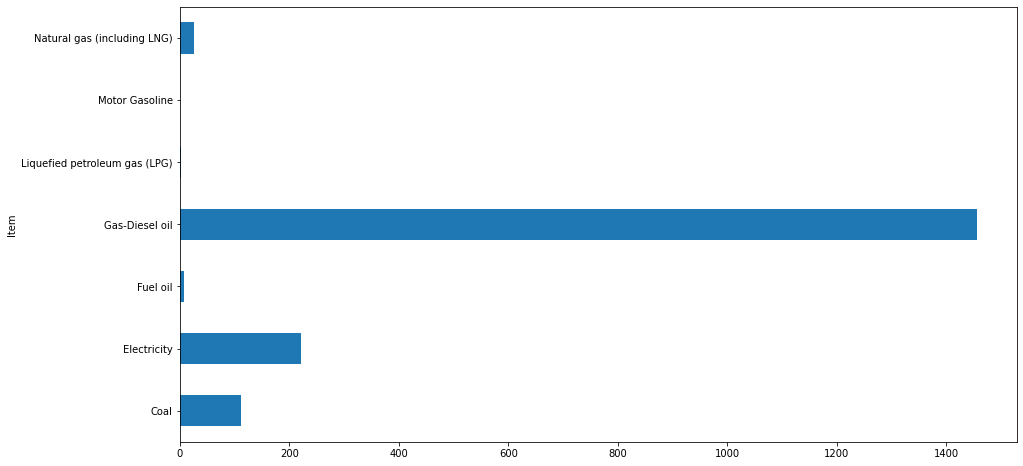

In [23]:
# Groupby Bangladesh and Item and plot the mean in horizontal bar chart
df_sub[df_sub["Area"]=="Bangladesh"].groupby("Item")["Value"].mean().plot(kind="barh", figsize=(15,8))

<AxesSubplot:ylabel='Item'>

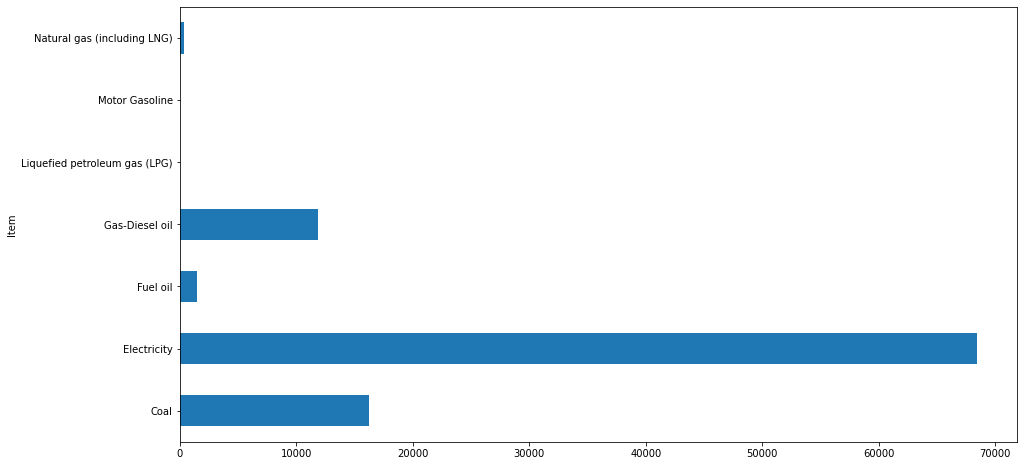

In [24]:
# Groupby India and Item and plot the mean
df_sub[df_sub["Area"]=="India"].groupby("Item")["Value"].mean().plot(kind="barh", figsize=(15,8))

<AxesSubplot:ylabel='Item'>

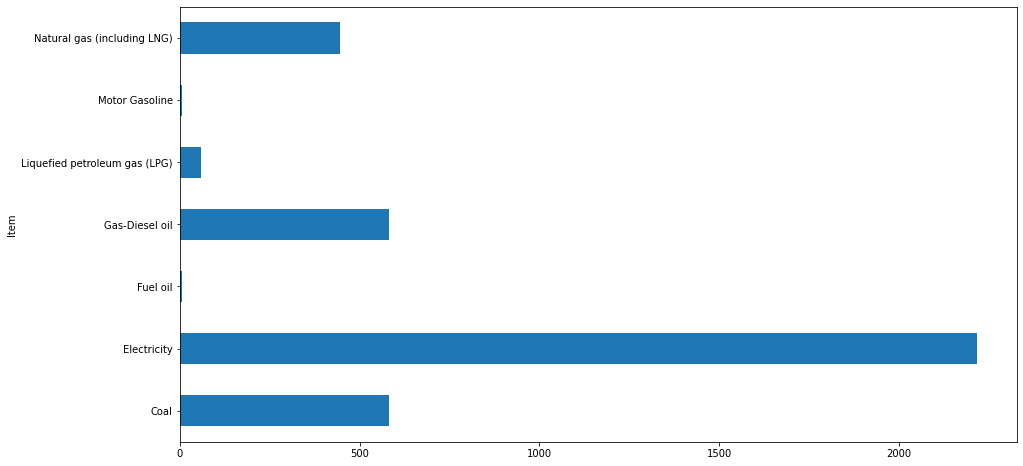

In [25]:
# Groupby Pakistan and Item and plot the mean
df_sub[df_sub["Area"]=="Pakistan"].groupby("Item")["Value"].mean().plot(kind="barh", figsize=(15,8))


<AxesSubplot:ylabel='Area'>

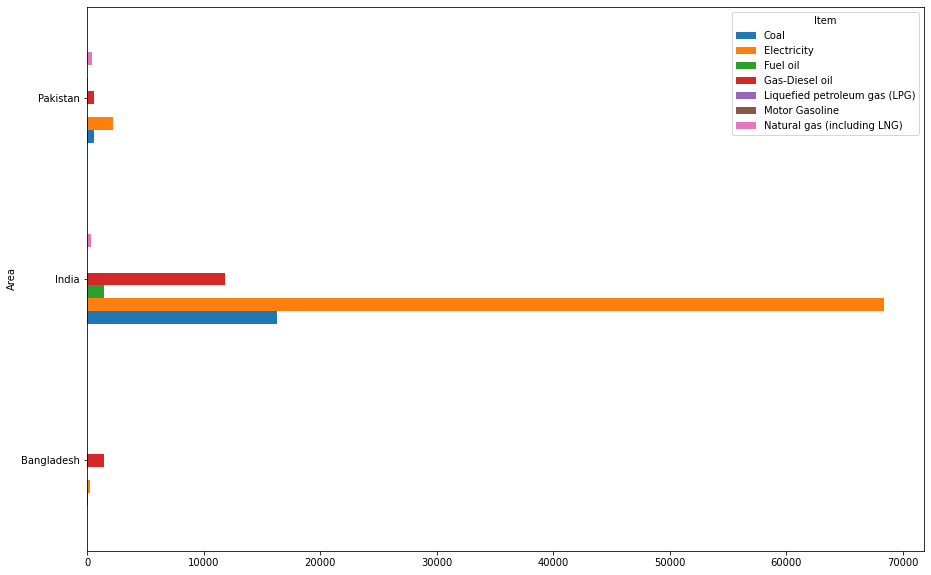

In [26]:
df_sub.groupby(['Area', 'Item'])['Value'].mean().unstack().plot(kind='barh', figsize=(15, 10))

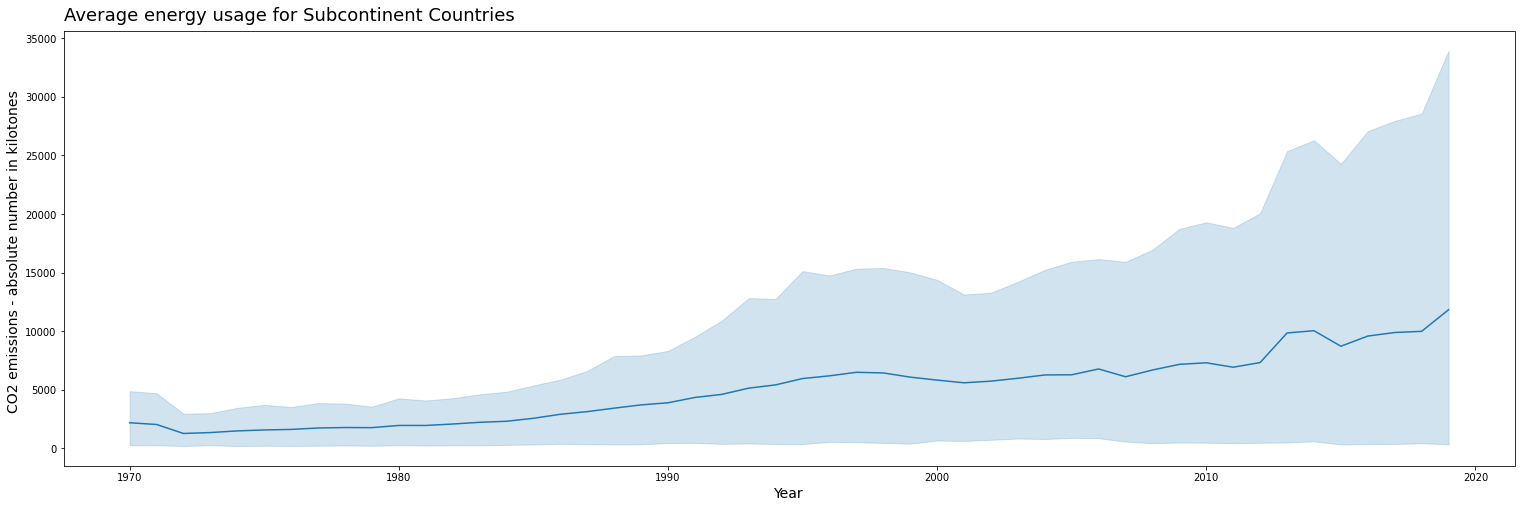

In [27]:
plt.figure(figsize = (26,8))
sns.lineplot(x = "Year", y = "Value", data = df_sub)

#customisation
#plt.ylim(10,)
#sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Average energy usage for Subcontinent Countries", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)

plt.show()

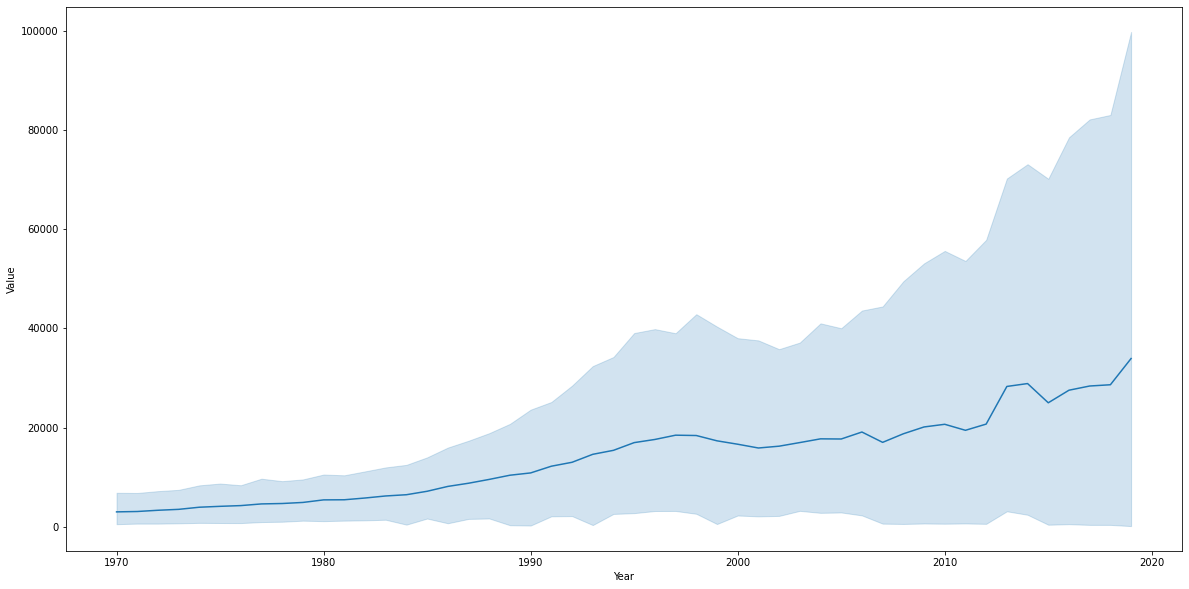

In [28]:
# Contruct visualisation for india's energy usage increase over the years
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df_sub[df_sub["Area"]=="India"])
plt.show()